In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.nn import ReLU
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = "cpu"
print(f"Using device = {device}")

Using device = cpu


In [3]:
# #to use gps for mac 
# if torch.backends.mps.is_available():
#     device = torch.device("mps")
# else:
#     device = "cpu"
# print(f"Using device : {device}")

In [4]:
df = pd.read_csv('iriss.csv')

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [7]:
df.shape

(150, 5)

In [8]:
X = df.drop(columns=['Species'])

In [9]:
X.shape

(150, 4)

In [10]:
y_df = df['Species']

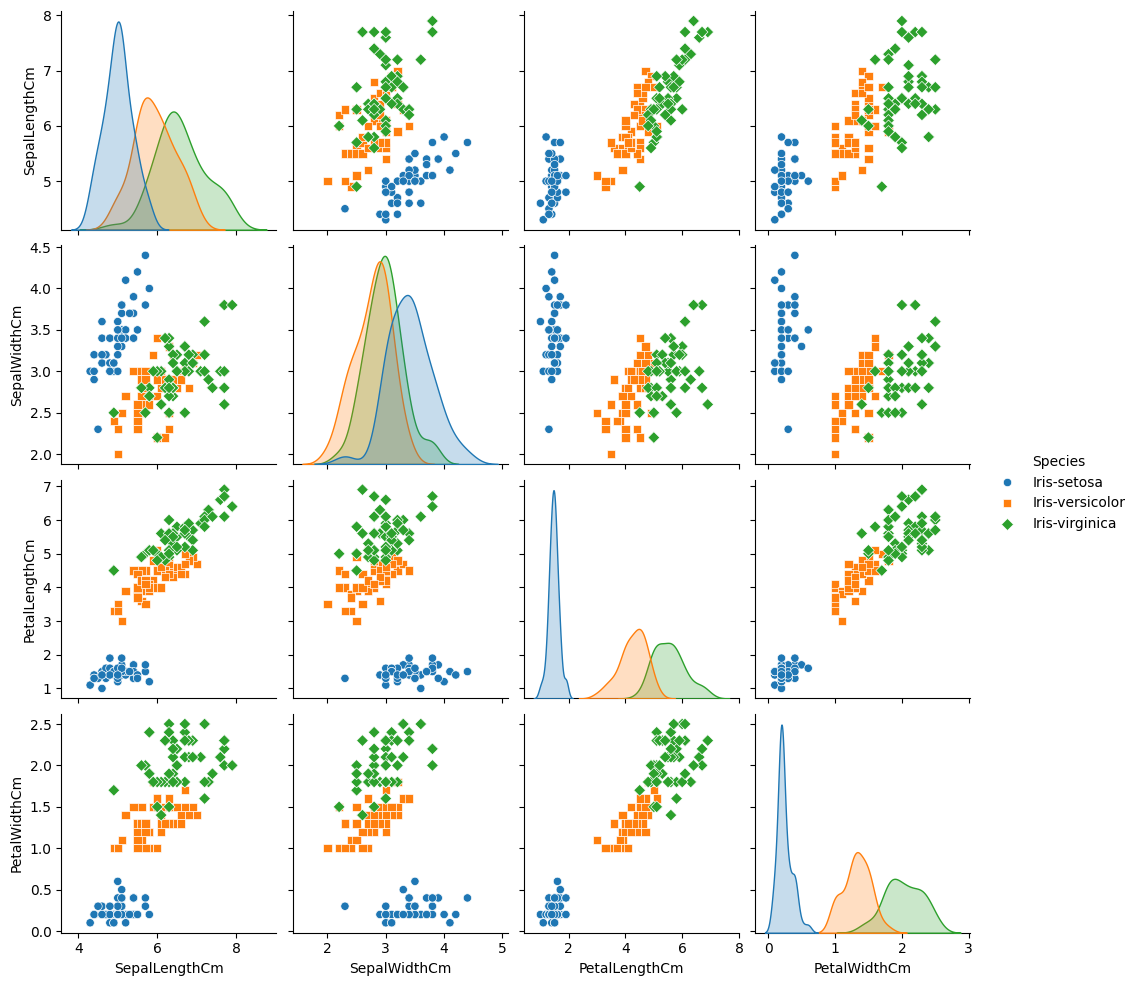

In [11]:
sns.pairplot(data=df, hue='Species', diag_kind='kde', markers=['o', 's', 'D'])
plt.show()

In [12]:
X = X.to_numpy()

In [13]:
#to convert species name from catergory to number like 0,1 etc.
lableEncoder = LabelEncoder()
y = lableEncoder.fit_transform(y = y_df) 

/tmp/ipykernel_127067/1076445283.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


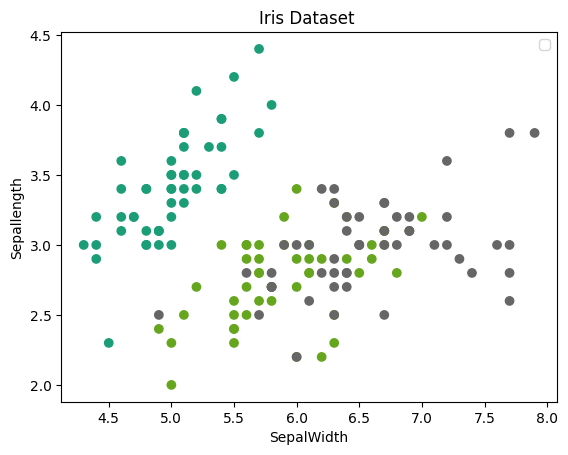

In [14]:
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.Dark2);
plt.ylabel("Sepallength")
plt.xlabel("SepalWidth")
plt.title("Iris Dataset ")
plt.legend()
plt.show()

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
#convert nd array to torch tensor type

In [17]:
print("After ",type(X), type(y))

After  <class 'torch.Tensor'> <class 'torch.Tensor'>


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
X_test.shape, y_test.shape

torch.Size([120, 4]) torch.Size([120])


(torch.Size([30, 4]), torch.Size([30]))

In [19]:
class IrissModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=4, out_features=20)
        self.layer2 = nn.Linear(in_features=20, out_features=20)
        self.layer3 = nn.Linear(in_features=20, out_features=3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


In [20]:
model0 = IrissModel()
model0.to(device)
next(model0.parameters()).device

device(type='cpu')

In [21]:
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.2956, -0.1695, -0.3111, -0.3371],
                      [-0.3390,  0.3715, -0.0827,  0.3796],
                      [ 0.2194,  0.3379,  0.1867,  0.1120],
                      [ 0.1958,  0.1173, -0.0044,  0.1907],
                      [ 0.1759,  0.1772,  0.3589, -0.4785],
                      [-0.3501,  0.2901,  0.2826, -0.0627],
                      [-0.1416,  0.2336, -0.1450,  0.0393],
                      [-0.4464, -0.2911,  0.4157, -0.1847],
                      [ 0.1060, -0.1584,  0.3606, -0.4100],
                      [ 0.2738,  0.4071,  0.0755, -0.4857],
                      [-0.1990, -0.3656,  0.2875,  0.0818],
                      [-0.2973,  0.2605,  0.4896, -0.1560],
                      [ 0.1510, -0.2994, -0.4143,  0.3164],
                      [ 0.1266, -0.3833, -0.3714,  0.3318],
                      [ 0.3903, -0.0363, -0.1582, -0.0945],
                      [-0.1001,  0.3182,  0.1959,  0.1601],
         

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model0.parameters(), lr=0.001)

In [23]:
def accuracy_fn(y_true, y_pred):


    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc 

In [24]:
epochs = 10000
torch.manual_seed(42)
trainLossList = []
testLossList = []

y_train = y_train.long()
y_test = y_test.long()

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model0.train()

    # 1. Forward pass 
    y_logits = model0(X_train)
    y_preds = torch.argmax(y_logits, dim=1)

    # 2. Compute training loss
    loss = loss_fn(y_logits, y_train)

    # 3. Zero grad the optimizer
    optimizer.zero_grad()

    # 4. Loss backward -> backpropagate
    loss.backward()

    #5. Step the optimizer
    optimizer.step()

    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

    ### Testing
    model0.eval()
    with torch.inference_mode():
        test_logits = model0(X_test)
        test_preds = torch.argmax(test_logits, dim=1)
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)
    
    if epoch%10 == 0:
        print(f"Epoch: {epoch}| Train Loss: {loss:.4f}| Train Acc: {acc}| Test Loss: {test_loss:.4f}| Test Acc: {test_acc}")

    trainLossList.append(loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())

Epoch: 0| Train Loss: 1.1193| Train Acc: 34.166666666666664| Test Loss: 1.1266| Test Acc: 30.0
Epoch: 10| Train Loss: 1.0725| Train Acc: 34.166666666666664| Test Loss: 1.0689| Test Acc: 30.0
Epoch: 20| Train Loss: 1.0388| Train Acc: 33.33333333333333| Test Loss: 1.0281| Test Acc: 36.666666666666664
Epoch: 30| Train Loss: 1.0068| Train Acc: 32.5| Test Loss: 0.9949| Test Acc: 36.666666666666664
Epoch: 40| Train Loss: 0.9687| Train Acc: 66.66666666666666| Test Loss: 0.9565| Test Acc: 70.0
Epoch: 50| Train Loss: 0.9215| Train Acc: 68.33333333333333| Test Loss: 0.9078| Test Acc: 70.0
Epoch: 60| Train Loss: 0.8657| Train Acc: 67.5| Test Loss: 0.8497| Test Acc: 70.0
Epoch: 70| Train Loss: 0.8026| Train Acc: 67.5| Test Loss: 0.7860| Test Acc: 70.0
Epoch: 80| Train Loss: 0.7350| Train Acc: 68.33333333333333| Test Loss: 0.7181| Test Acc: 70.0
Epoch: 90| Train Loss: 0.6682| Train Acc: 70.0| Test Loss: 0.6521| Test Acc: 70.0
Epoch: 100| Train Loss: 0.6089| Train Acc: 70.83333333333334| Test Loss: 

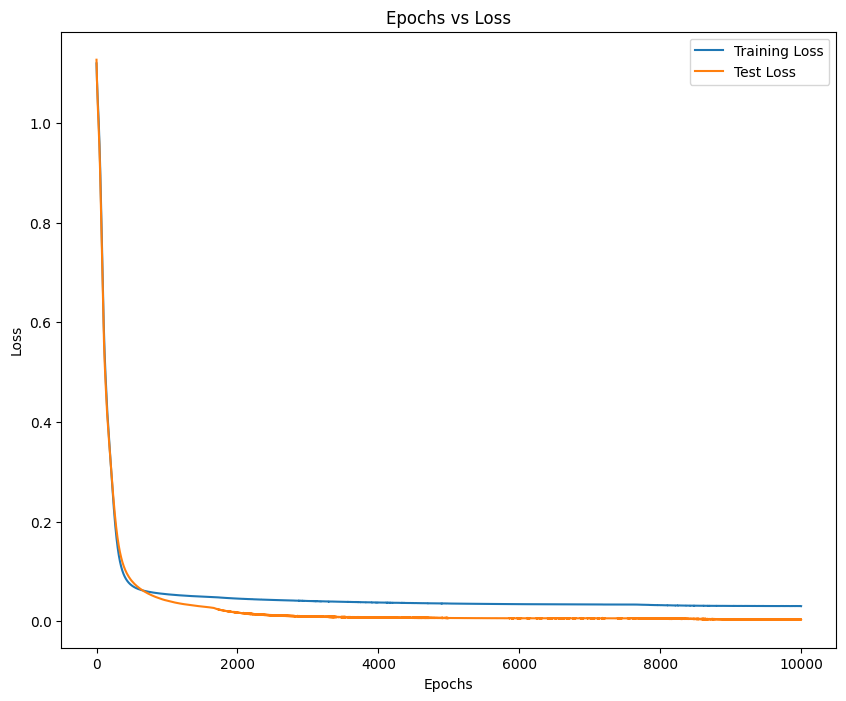

In [25]:
# Plot Loss Curve
plt.figure(figsize=(10,8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend();

In [26]:
model0.eval()
with torch.inference_mode():
    test_logits = model0(X_test)
    y_preds = torch.argmax(test_logits, dim=1)
print(y_preds)

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])


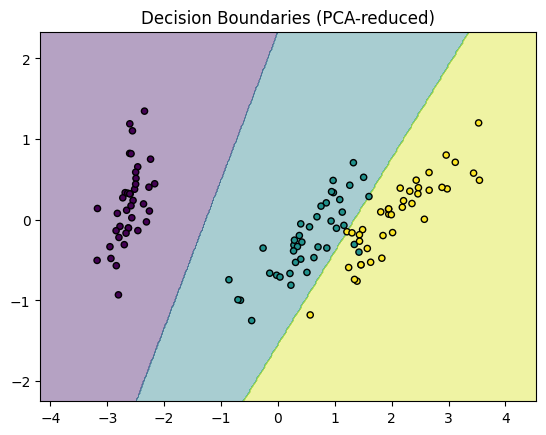

In [28]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train.cpu().numpy())

# Create meshgrid
h = 0.02  # step size
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on meshgrid
device = "cpu"
model0.eval()
device = "cpu"
next(model0.parameters()).device
with torch.inference_mode():
    Z = model0(torch.tensor(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]), 
                           dtype=torch.float32).to(device))
    Z = Z.argmax(dim=1).cpu().numpy()

# Plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train.cpu(), s=20, edgecolor='k')
plt.title('Decision Boundaries (PCA-reduced)')
plt.show()

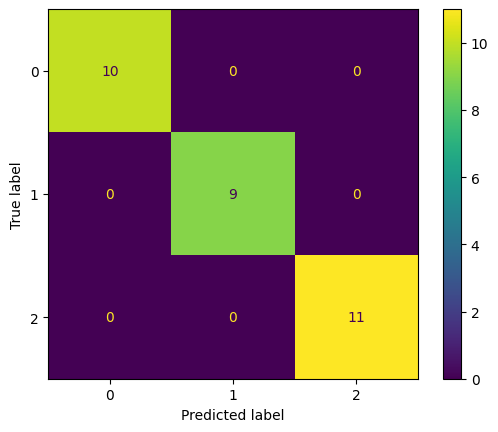

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test.to("cpu"), y_pred=y_preds.to("cpu"))
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()